In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

names = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
data_path = "Data\\cars\\auto-mpg.data.txt"
cars = pd.read_table(os.path.relpath(data_path),delim_whitespace=True, names=names)
cleaned_cars = cars[cars['horsepower']!='?']
float_hp = cleaned_cars['horsepower'].astype(float)
cleaned_cars['horsepower'] = float_hp

print(cleaned_cars.shape)
cleaned_cars.head()

# See regions of origin
unique_regions = cars.origin.unique()
print(unique_regions)
cleaned_cars.head()

(392, 9)
[1 3 2]


C:\Users\v-haharv\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


<h3>Dummy Variables</h3>
<p>When a dataset has categorical data on the row level that includes more than two options, e.g. animal, mineral, vegetable, in order to perform classification using the logit function, we'll need to create dummy variables. This just means that rather than one column with three possible values, there will be three columns with only 0 or 1 as values.</p>
<p>It's worthwhile to double check whether the variables are mutually exclusive; if a category is pivoted to dummy variables, they usually shouldn't add up to more than 1 on the row level.</p>

<p>In pandas, we can use the ````pd.get_dummies(df["category"], prefix = "category")```` then we can use the ````pd.concat()```` function to add it onto the original dataframe</p>


In [3]:
cylinders_dummy = pd.get_dummies(cleaned_cars["cylinders"], prefix="cyl")
year_dummy = pd.get_dummies(cleaned_cars["model year"], prefix = "year")
cleaned_cars = pd.concat([cleaned_cars, cylinders_dummy, year_dummy], axis=1)

cleaned_cars.drop(['cylinders','model year'], axis=1, inplace=True)

cleaned_cars["original_row"] = cleaned_cars.index

cleaned_cars.head()
new_index = range(cleaned_cars.shape[0])
cleaned_cars["new_index"] = new_index

cleaned_cars.set_index("new_index", inplace=True)
cleaned_cars.index.name = None
cleaned_cars.head()


,mpg,displacement,horsepower,weight,acceleration,origin,car name,cyl_3,cyl_4,cyl_5,...,year_74,year_75,year_76,year_77,year_78,year_79,year_80,year_81,year_82,original_row
0,18.0,307.0,130.0,3504.0,12.0,1,chevrolet chevelle malibu,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,350.0,165.0,3693.0,11.5,1,buick skylark 320,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,18.0,318.0,150.0,3436.0,11.0,1,plymouth satellite,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,16.0,304.0,150.0,3433.0,12.0,1,amc rebel sst,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,17.0,302.0,140.0,3449.0,10.5,1,ford torino,0,0,0,...,0,0,0,0,0,0,0,0,0,4


<H3>Multiclass Classification</H3>
<p>Multiclass classification is intended to predict the category of an observation where there are more than two possibilities. If there are two possibilities, we can just use binary classification, if there is only one, then we can just name the thing and be done (that was a joke).</p>

<p>There are a number of approaches to multiclass classification, and for now, we can use the <a href="https://en.wikipedia.org/wiki/Multiclass_classification#One-vs.-rest"> one-versus-all (or one-versus-rest) method</a>, which treats one of the classification categories as the Positive case and the rest as False cases</p>




In [4]:
# Note...it took for-fucking-ever to do this because the index was somehow out of range and I had to set a new one
# randomize indices
shuffled_rows = np.random.permutation(cleaned_cars.index)

print(shuffled_rows)
# randomize data
shuffled_cars = cleaned_cars.iloc[shuffled_rows]


# 70/30 train/test
train_rows = int(shuffled_cars.shape[0]* .7)
train = shuffled_cars.iloc[:train_rows]
test = shuffled_cars.iloc[train_rows :]



[ 34 158 296 374 217  57 307  96 308 291 323 180 329  23 242 359 130 376
 263   8 139  14  30 204 131 319 270 239 234 266  82  73 347  24 142 271
  16  27  90 189 268 154  12 371 198 126 298 317 193 178 361 252 103 197
 195 349  92 235 144  11 211 264  52 145 240   9  88 367  94 232 166 143
 343 216 320 207 383  85 328 175 350 236  68  72 112 360  59 292  31 355
  74 297  60 137 300  25 111 192 171 243 276  22  61  35 201 199 381 327
 287 357 389 226 384 275 124 125 153   4 161 278 386 206  55 341  41  46
 375 316 282 309 138  39 212   2 260 285 259 390 221 230 373 106   7 215
 348  45 159 190 170 261 105 241 257  79 179 237  98 238 132  28 104 322
 256 326 169 294  76 188 379  62 123 177  51 164  70 148  69 248  97 310
  75 265 184 306 151 318   3 342 380  17 120 353 352  18  20 245 225 284
 330  36 358 173 331 121 382 301 333  19  37 244  47 387   0 336 117 258
 340 101 155 315  44  43  29 253  64  21  32 267 224 210 255 133 346  63
 186 146  95 160 280 281  58  54  13 304 109 370  4

<H3> Dewing it 4 reel</H3>
<p>Because we're using the one-vs-rest approach, and there are 3 origins for the vehicles, we'll need to train 3 linear regression models. Generally, a multiclass classification problem with k-classes will need k-trained models.</p>





In [5]:
from sklearn.linear_model import LogisticRegression

unique_origins = train.origin.unique()

features = [i for i in cleaned_cars.columns.values if i.startswith("year") or i.startswith("cyl")]

    
# create dictionary to hold results of models
models = {}

for i in unique_origins:
    model = LogisticRegression()
    
    X_train = train[features]
    y_train = train["origin"] == i
    
    model.fit(X_train, y_train)
    models[i] = model



In [6]:
# Test that shit

# Create df for predicted probabilities
testing_probs = pd.DataFrame(columns=unique_origins)


for i in unique_origins:
    # get features from test df
    X_test = test[features]
    
    # loop through models, predict each origin, append True col to testing_probs
    testing_probs[i] = models[i].predict_proba(X_test)[:,1]

testing_probs.head()

,1,3,2
0,0.294330,0.180192,0.534180
1,0.520696,0.399043,0.097325
2,0.959182,0.017883,0.046378
3,0.520696,0.399043,0.097325
4,0.474055,0.248703,0.266679


In [7]:
# Now to generate predicted labels

# use df.idxmax() to return series w/max value from one of several columns
predicted_origins = testing_probs.idxmax(axis=1)

# Append to test dataframe

test['predictions'] = list(predicted_origins)

test["Comparison"] = test['predictions'] ==test.origin

origin_accuracy = test[test['Comparison']==True].shape[0]/test[test['Comparison']==False].shape[0]
print(origin_accuracy)

category_performance = {}

#Double check all of this bullshit
for i in unique_origins:
    origins = test[test['origin'] == i]
    
    true_positives = origins[origins.Comparison == True].shape[0]
    false_positives = origins[origins.Comparison == False].shape[0]
    
    sensitivity = true_positives/(true_positives+false_positives)
    d = dict(sensitivity=sensitivity, true_pos = true_positives, false_pos = false_positives)
    category_performance[i] = d
    
print(category_performance)


1.8095238095238095
{1: {'sensitivity': 0.8289473684210527, 'true_pos': 63, 'false_pos': 13}, 3: {'sensitivity': 0.3, 'true_pos': 6, 'false_pos': 14}, 2: {'sensitivity': 0.3181818181818182, 'true_pos': 7, 'false_pos': 15}}


C:\Users\hshar\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\hshar\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002555CC04898>]], dtype=object)

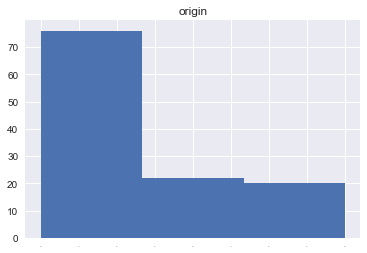

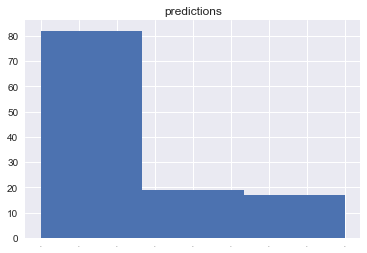

In [8]:
test.hist("origin", xlabelsize= 1, bins=3)
test.hist("predictions",xlabelsize=1, bins=3)